In [1]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


In [ ]:
digits = load_digits()

In [ ]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

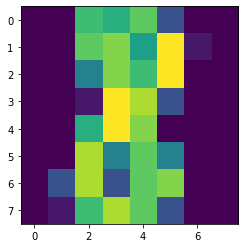

In [ ]:
plt.imshow(digits.images[40])
plt.show()

In [65]:
# Hyper parameters search space
params ={
      'n_estimators' : [50,100,150,200,250,300],
      'criterion' : ['gini','entropy'],
      'max_depth' : [3,4,5]

}

# Grid Search

In [ ]:
X = digits.data
y = digits.target

clf = GridSearchCV(estimator =RandomForestClassifier(),param_grid = params, cv=5)
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250, 300]})

In [ ]:
# Hyper parameters vs mean_test_score
results = pd.DataFrame(clf.cv_results_)
results[['param_criterion','param_max_depth','param_n_estimators','mean_test_score']].head(10)

,param_criterion,param_max_depth,param_n_estimators,mean_test_score
0,gini,3,50,0.830280
1,gini,3,100,0.831931
2,gini,3,150,0.842536
3,gini,3,200,0.838627
4,gini,3,250,0.845314
5,gini,3,300,0.845873
6,gini,4,50,0.867567
7,gini,4,100,0.872019
8,gini,4,150,0.871472
9,gini,4,200,0.874807


In [ ]:
# Best Params and Score

print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 250}


In [ ]:
print(clf.best_score_)

0.9065335809346952


# Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

X = digits.data
y = digits.target

clf = RandomizedSearchCV(estimator =RandomForestClassifier(),param_distributions = params, cv=5, scoring='accuracy',n_iter=10)
clf.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   scoring='accuracy')

In [ ]:
results =  pd.DataFrame(clf.cv_results_)
results[['param_criterion','param_max_depth','param_n_estimators','mean_test_score']]

,param_criterion,param_max_depth,param_n_estimators,mean_test_score
0,gini,3,200,0.845303
1,gini,5,50,0.890949
2,gini,4,250,0.877040
3,gini,4,100,0.871472
4,entropy,4,250,0.877038
5,gini,5,250,0.898186
6,gini,3,300,0.840848
7,entropy,3,250,0.848638
8,entropy,3,300,0.839743
9,gini,4,200,0.876478


In [ ]:
print(clf.best_params_)

{'n_estimators': 250, 'max_depth': 5, 'criterion': 'gini'}


In [ ]:
print(clf.best_score_)

0.8981863200247602


# Baysien Optimization for Hyper Parameter Tunning

In [28]:
from hyperopt import fmin
from hyperopt import tpe
from hyperopt import STATUS_OK
from hyperopt import hp
from hyperopt import Trials
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv('/content/credit_data.csv')

In [44]:
df.head()

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


In [45]:
df.default.value_counts()

0    1717
1     283
Name: default, dtype: int64

We have a problem of Imbalance class, here we use oversampling techique to encouter this problem

In [9]:
283*6

1698

In [46]:
over_samp = df[df.default==1].sample(n=283*6, replace=True)

In [47]:
over_samp.head()

,clientid,income,age,loan,LTI,default
1834,1835,63321.909267,19.487915,8092.982780,0.127807,1
1514,1515,32086.913537,28.410776,6362.390354,0.198286,1
385,386,20258.538662,29.115532,2767.837300,0.136626,1
887,888,29366.582334,22.484049,4049.253865,0.137886,1
610,611,24294.676892,22.263096,4360.053009,0.179465,1


In [48]:
df = pd.concat([df[df.default==0],over_samp])
df.head()

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
5,6,24904.064140,57.471607,15.498598,0.000622,0


In [49]:
df.default.value_counts()

0    1717
1    1698
Name: default, dtype: int64

In [50]:
df = df.drop('clientid',axis=1)

In [55]:
df.isnull().sum()

income     0
age        0
loan       0
LTI        0
default    0
dtype: int64

# Model Building

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('default',axis=1), df.default, test_size=0.3, shuffle=True, stratify=df.default, random_state=1111)

In [66]:
# Hyper parameter Search Space
space = {

 'C':hp.uniform('C',0.05,1),
 'fit_intercept': hp.choice('fit_intercept',[True,False]),
 'solver': hp.choice('solver',['newton-cg','sag','liblinear','lbfgs','saga']),
 'tol':hp.uniform('tol',0.000001,0.0001),
 'warm_start':hp.choice('warm_start',[True,False])  

}

In [52]:
def objective(params ,X=X_train, y=y_train):
  clf = LogisticRegression(**params)

  # Evaluate best score
  best_score = cross_val_score(estimator= clf,X=X_train, y=y_train, cv=5, scoring='accuracy').mean()
  

  #Evaluate loss
  loss = 1-best_score

  return {'loss':loss, 'params':params, 'status':STATUS_OK}

In [56]:
objective({'solver':'sag'},X_train,y_train)

{'loss': 0.19999999999999996, 'params': {'solver': 'sag'}, 'status': 'ok'}

In [61]:
best_hyper_params = fmin(fn= objective, space=space, max_evals=500,algo=tpe.suggest)

100%|██████████| 500/500 [06:22<00:00,  1.31it/s, best loss: 0.06108786610878669]


In [62]:
best_hyper_params

{'C': 0.9860693124201371,
 'fit_intercept': 0,
 'solver': 0,
 'tol': 2.668156806036487e-05,
 'warm_start': 1}

In [64]:
clf = LogisticRegression(C=best_hyper_params['C'], tol=best_hyper_params['tol'], warm_start=best_hyper_params['warm_start'])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8526829268292683